In [5]:
import pandas as pd
import numpy as np
from google.colab import files
import io

In [12]:
data = files.upload()
df = pd.read_csv(io.StringIO(data['weather.csv'].decode('utf-8')))

Saving weather.csv to weather.csv


In [13]:
df

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01
...,...,...,...,...,...,...,...,...,...,...
181955,Soc Trang,28,23,8,SSW,0.0,75,50,1011,2016-12-28
181956,Soc Trang,30,24,21,ENE,7.2,81,50,1011,2017-12-28
181957,Soc Trang,26,24,9,ENE,1.3,91,75,1009,2018-12-28
181958,Soc Trang,30,23,11,E,0.0,74,6,1012,2019-12-28


In [54]:
ho_chi_minh = df[df['province'].str.lower().str.contains("ho chi minh")]

In [55]:
print(ho_chi_minh)

              province  max  min  wind wind_d  rain  humidi  cloud  pressure  \
4501  Ho Chi Minh City   29   22     6     SE  18.5      89     68      1010   
4502  Ho Chi Minh City   34   24     5      E   0.0      59     20      1010   
4503  Ho Chi Minh City   29   23     4      S   0.2      81     42      1008   
4504  Ho Chi Minh City   32   23     7      E   1.8      76     35      1012   
4505  Ho Chi Minh City   33   24     4     SE   0.0      69     15      1010   
...                ...  ...  ...   ...    ...   ...     ...    ...       ...   
9262  Ho Chi Minh City   30   23     6    ESE   2.5      84     64      1011   
9263  Ho Chi Minh City   30   21     9    SSW   0.0      59     50      1014   
9264  Ho Chi Minh City   34   25     5      E   0.0      67     28      1013   
9265  Ho Chi Minh City   33   25     9      E   0.0      66     38      1012   
9266  Ho Chi Minh City   31   25     7    ESE   2.9      71     41      1010   

            date  
4501  2009-01-01  
4

In [92]:
ho_chi_minh = ho_chi_minh.copy()  # Tạo một bản sao của DataFrame để tránh ảnh hưởng đến DataFrame gốc
ho_chi_minh['date'] = pd.to_datetime(ho_chi_minh['date'])

# Lấy những dòng trong khoảng từ ngày A đến ngày B
start_date = '2020-01-01'
end_date = '2021-12-31'
ho_chi_minh_edit = ho_chi_minh.loc[(ho_chi_minh['date'] >= start_date) & (ho_chi_minh['date'] <= end_date)]

In [93]:
ho_chi_minh_edit

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
4512,Ho Chi Minh City,35,24,9,ENE,0.0,51,11,1014,2020-01-01
4513,Ho Chi Minh City,30,23,8,NE,0.0,63,35,1011,2021-01-01
4525,Ho Chi Minh City,35,25,7,ESE,0.0,59,16,1013,2020-01-03
4526,Ho Chi Minh City,31,24,4,SE,2.5,70,59,1010,2021-01-03
4538,Ho Chi Minh City,34,24,5,SW,0.0,61,15,1012,2020-01-04
...,...,...,...,...,...,...,...,...,...,...
9049,Ho Chi Minh City,32,25,7,S,0.0,75,33,1009,2020-12-28
9113,Ho Chi Minh City,30,23,15,NNE,0.0,60,49,1011,2020-12-31
9177,Ho Chi Minh City,28,23,18,SW,0.6,66,51,1008,2020-12-22
9189,Ho Chi Minh City,30,25,9,S,0.1,68,53,1010,2020-12-30


In [94]:
column_name = 'wind_d'
ho_chi_minh_edit = ho_chi_minh_edit.drop(column_name, axis=1)

In [95]:
column_name = 'date'
ho_chi_minh_edit = ho_chi_minh_edit.drop(column_name, axis=1)

In [96]:
column_name = 'province'
ho_chi_minh_edit = ho_chi_minh_edit.drop(column_name, axis=1)

In [97]:
ho_chi_minh_edit

,max,min,wind,rain,humidi,cloud,pressure
4512,35,24,9,0.0,51,11,1014
4513,30,23,8,0.0,63,35,1011
4525,35,25,7,0.0,59,16,1013
4526,31,24,4,2.5,70,59,1010
4538,34,24,5,0.0,61,15,1012
...,...,...,...,...,...,...,...
9049,32,25,7,0.0,75,33,1009
9113,30,23,15,0.0,60,49,1011
9177,28,23,18,0.6,66,51,1008
9189,30,25,9,0.1,68,53,1010


In [98]:
ho_chi_minh_edit['rain'] = ho_chi_minh_edit['rain'].apply(lambda x: 'Y' if x > 1 else 'N')


In [99]:
ho_chi_minh_edit

,max,min,wind,rain,humidi,cloud,pressure
4512,35,24,9,N,51,11,1014
4513,30,23,8,N,63,35,1011
4525,35,25,7,N,59,16,1013
4526,31,24,4,Y,70,59,1010
4538,34,24,5,N,61,15,1012
...,...,...,...,...,...,...,...
9049,32,25,7,N,75,33,1009
9113,30,23,15,N,60,49,1011
9177,28,23,18,N,66,51,1008
9189,30,25,9,N,68,53,1010


In [100]:
from matplotlib import pyplot as plt
import seaborn as sns

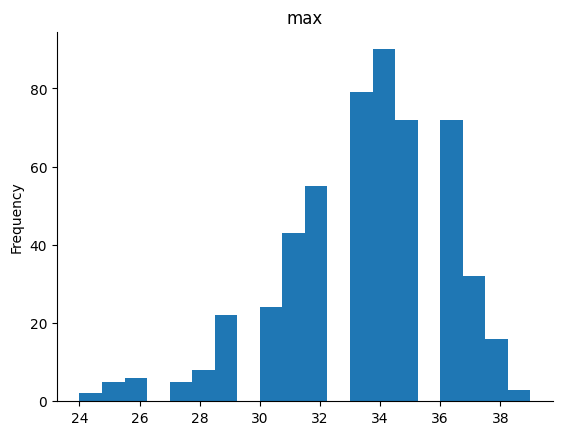

In [101]:
ho_chi_minh_edit['max'].plot(kind='hist', bins=20, title='max')
plt.gca().spines[['top', 'right',]].set_visible(False)

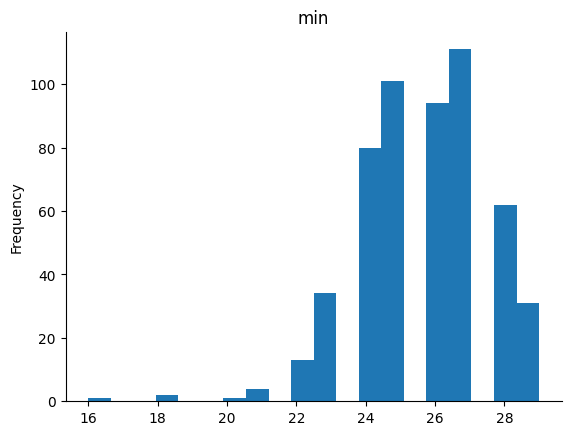

In [102]:
ho_chi_minh_edit['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

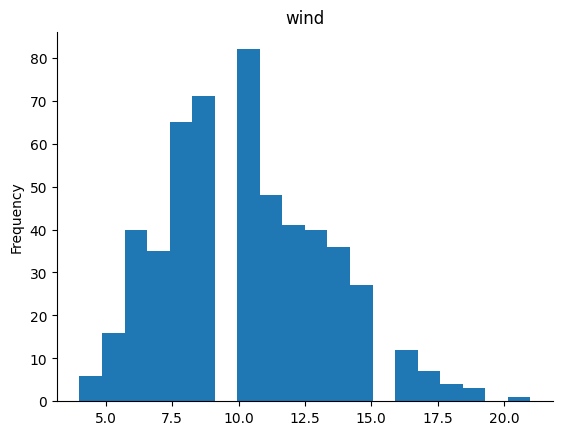

In [103]:
ho_chi_minh_edit['wind'].plot(kind='hist', bins=20, title='wind')
plt.gca().spines[['top', 'right',]].set_visible(False)

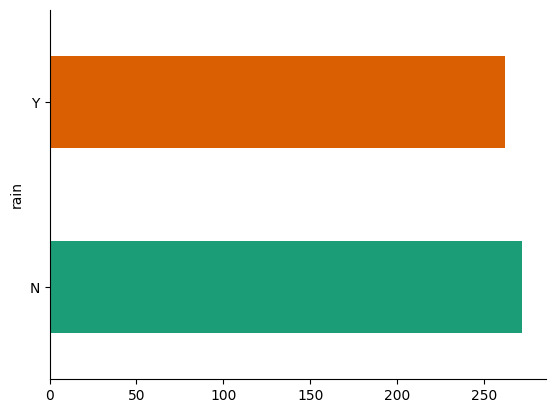

In [104]:
ho_chi_minh_edit.groupby('rain').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

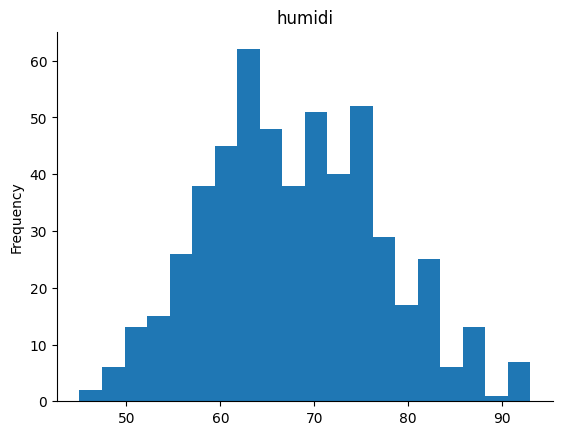

In [105]:
ho_chi_minh_edit['humidi'].plot(kind='hist', bins=20, title='humidi')
plt.gca().spines[['top', 'right',]].set_visible(False)

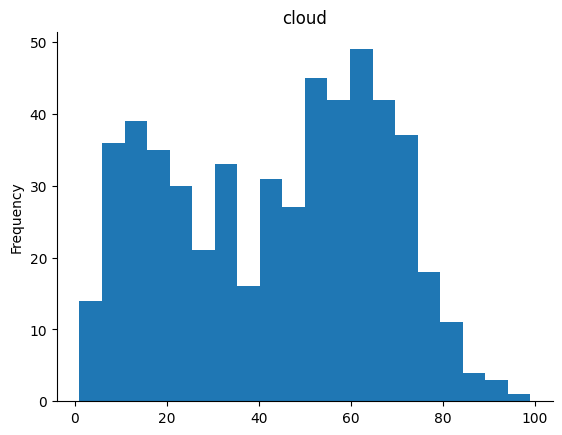

In [106]:
ho_chi_minh_edit['cloud'].plot(kind='hist', bins=20, title='cloud')
plt.gca().spines[['top', 'right',]].set_visible(False)

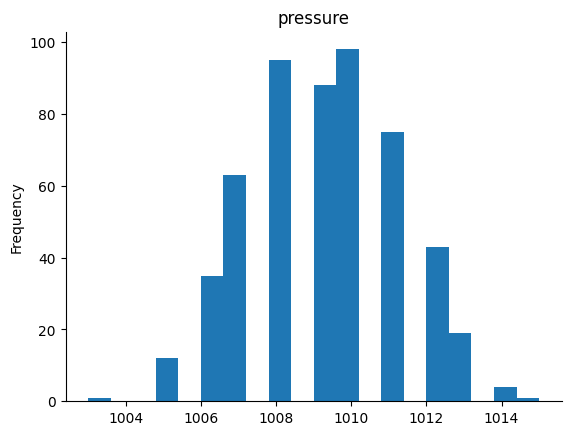

In [107]:
ho_chi_minh_edit['pressure'].plot(kind='hist', bins=20, title='pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)